#Problem 01

51
0
100
256


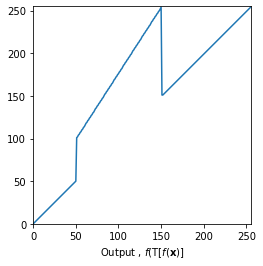

In [9]:
%matplotlib inline
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

c = np.array([(50,100),(150,254)])


t1=np.linspace(0,c[0,0],c[0,0]+1-0).astype("uint8")
print (len(t1))

t2=np.linspace(c[0,0],c[0,1],0).astype("uint8")
print(len(t2))

t3=np.linspace(c[0,1]+1,c[1,1],c[1,0]-c[0,0]).astype("uint8")
print(len(t3))

t4=np.linspace(c[1,1]-1,c[1,0],0).astype("uint8")

t5=np.linspace(c[1,0]+1,c[1,1],c[1,1]-c[1,0]+1).astype("uint8")


transform = np.concatenate((t1,t2),axis=0).astype("uint8")
transform =np.concatenate((transform,t3),axis=0).astype("uint8")
transform =np.concatenate((transform,t4),axis=0).astype("uint8")
transform =np.concatenate((transform,t5),axis=0).astype("uint8")

print(len(transform))
fig,ax  = plt.subplots()

ax.plot(transform)
ax.set_xlabel(r'Input , $f(\mathbf{x}$')
ax.set_xlabel('Output , $f(\mathrm{T}[f(\mathbf{x})]$')

ax.set_xlim(0,255)
ax.set_ylim(0,255)

ax.set_aspect("equal") # To ensure the aspect ratio of x and y axis are equal

original_image = cv.imread("emma.jpg",cv.IMREAD_GRAYSCALE)
cv.imshow("Image",original_image)
cv.waitKey(0)
cv.destroyAllWindows()

image_t = cv.LUT(original_image,transform)
cv.imshow("Image",image_t)
cv.waitKey(0)
cv.destroyAllWindows()



